In [14]:
import pandas as pd
import os,pickle
from collections import Counter
import numpy as np

In [15]:
### Generate the label dictionary
dir_cohort = '../anno_ref/cohorts'
feature_type = 'histology'
df_feat = pd.read_csv(os.path.join(dir_cohort,feature_type+'.csv'))
dict_feat_np = dict(Counter(df_feat[feature_type]))
dict_feat_np = {k: v for k, v in sorted(dict_feat_np.items(), key=lambda item: item[1])}

***
### Heatmap for syn res

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from matplotlib import gridspec
from matplotlib_venn import venn3, venn3_circles
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'lines.linewidth':4,
         'font.sans-serif':'Ariel',
         'font.weight':'bold',
          'font.size':10}
# font = {'fontname':'monospace', 'size':'15'}
pylab.rcParams.update(params)

In [7]:
cohorts = ['histology','organ','origin','system','pancancer']
dir_out = './figure4/'
dir_anlyze = '../mutsig_out/anlyze'

# Read all cohort result file
feature_type = 'histology';syn_nsyn = 'syn'
sig_pathlist = pickle.load(open(os.path.join(dir_anlyze, feature_type +'.'+syn_nsyn+'.sig_genes.pathlist.062121.pkl'),'rb'))
lfeat = [i.split('/')[-1].split('.')[0] for i in sig_pathlist]

# Read the significant gene dataframe after FDR calculation
feature_type = 'histology';syn_nsyn = 'syn';run = 'cohort_072221';threshold = 1;
df_syn = pd.read_csv(os.path.join(dir_out,feature_type+'.syn.df_all_forheatmap.'+run+'.'+str(threshold)+'.csv'),index_col = 0)
df_syn['FDR'] = -np.log10(df_syn['FDR']) # Transform into log scale

In [29]:
### Sort by genes
df_pivot_syn = df_syn.pivot_table('FDR', index='gene', columns='feature')
for feat in lfeat:
    if feat not in df_pivot_syn.columns:
#         df_pivot_syn[feat] = float('NaN')
        print(f'No significant genes: {feat}')
df_pivot_syn['n_sig_gene'] = df_pivot_syn.notnull().sum(axis=1)
df_pivot_gene_syn = df_pivot_syn.sort_values(by = 'n_sig_gene', ascending = False)
df_pivot_gene_syn = df_pivot_gene_syn.iloc[:, 0:-1]

No significant genes: Bone-Osteosarc
No significant genes: CNS-Oligo
No significant genes: Myeloid-AML
No significant genes: CNS-Medullo
No significant genes: SoftTissue-Leiomyo
No significant genes: Biliary-AdenoCA
No significant genes: Kidney-ChRCC
No significant genes: Lymph-CLL
No significant genes: Lung-SCC
No significant genes: Kidney-RCC
No significant genes: Thy-AdenoCA
No significant genes: Lung-AdenoCA
No significant genes: Liver-HCC
No significant genes: CNS-GBM
No significant genes: Cervix-SCC
No significant genes: Bladder-TCC
No significant genes: ColoRect-AdenoCA
No significant genes: Myeloid-MPN
No significant genes: Ovary-AdenoCA
No significant genes: Stomach-AdenoCA


In [26]:
def draw_heatmap(df, fontsize):
    fig, ax = plt.subplots(figsize = (len(df.columns)/2,len(df)/2))
    params = {'lines.linewidth':4,
         'font.sans-serif':'Ariel',
         'font.weight':'bold',
             'font.size':fontsize}
    pylab.rcParams.update(params)
    
    cmap = plt.get_cmap("YlGnBu",30);cmap.set_under('white')
    ax = sns.heatmap(df,cmap=cmap,yticklabels=True,xticklabels=True,\
                     square=True,linewidth = 0.5,linecolor="grey", cbar_kws={"shrink": 0.3})
    ax.set_ylabel('Significant Genes'); ax.set_xlabel('Histology Cohort')
    # add patient number to ticks
    labels=[]
    for label in ax.get_yticklabels():
        feat = label.get_text()
        new_label =feat +  ' (n='+str(dict_feat_np[feat])+') '
        labels.append(new_label)
        label.set_ha("right")
    ax.set_yticklabels(labels)
#     ax.tick_params(axis='x', which='major', labelbottom = True, \
#                    bottom=False, top = False, labeltop=False,rotation = 90)
    plt.tight_layout()
    plt.show()
    # plt.savefig(os.path.join(dir_out,'venn_diagram_nsyn.pdf'))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


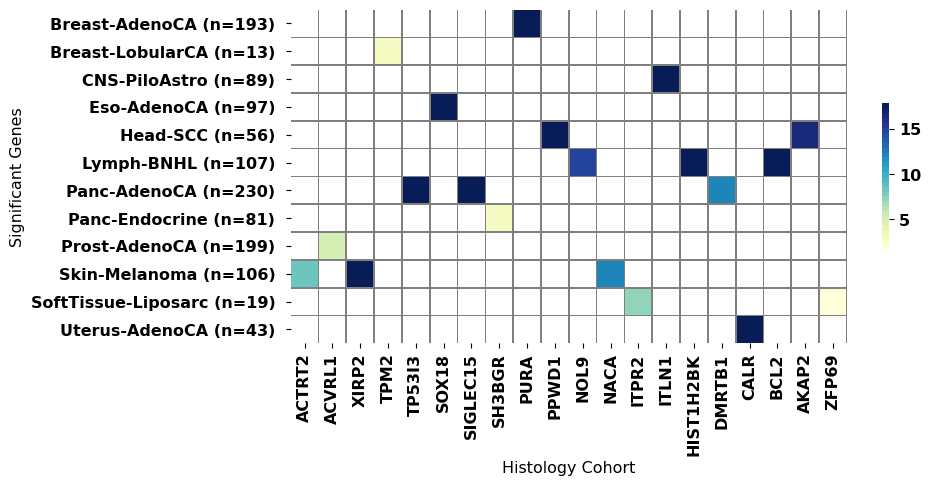

In [31]:
draw_heatmap(df_pivot_gene_syn.transpose(),8)